In [114]:
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [115]:
im = pd.read_csv("Datasets/immigrants.csv", skiprows=14, nrows=215)
im.columns=['Birthplace', '1980-1990', '1991-2000', '2001-2010', '2011-2021']

In [116]:
for i in range(len(im)):
    if im['Birthplace'][i][-2:].isdigit():
        im['Birthplace'][i] = im['Birthplace'][i][0:-3]
    if im['Birthplace'][i][-1].isdigit():
        im['Birthplace'][i] = im['Birthplace'][i][0:-2]

    im['1980-1990'][i] = int(im['1980-1990'][i].replace(',', ''))
    im['1991-2000'][i] = int(im['1991-2000'][i].replace(',', ''))
    im['2001-2010'][i] = int(im['2001-2010'][i].replace(',', ''))
    im['2011-2021'][i] = int(im['2011-2021'][i].replace(',', ''))
    if im['1980-1990'][i] == 0 and im['1991-2000'][i] == 0 and im['2001-2010'][i] == 0 and im['2011-2021'][i] == 0:
        im=im.drop(labels=i)

im = im.sort_values(by=['Birthplace'])
im.reset_index(drop=True, inplace=True)

print("Number of country/region:", len(im))
im.head()

Number of country/region: 200


,Birthplace,1980-1990,1991-2000,2001-2010,2011-2021
0,Afghanistan,3920,14745,22280,21340
1,Albania,15,4130,8000,5500
2,Algeria,1345,11745,32430,32580
3,Andorra,0,0,0,30
4,Angola,415,390,1315,580


In [117]:
gdp = pd.read_csv("Datasets/gdp.csv", skiprows=4, nrows=266, usecols=[0, 55, 65])
gdp.columns = ['Birthplace', 'GDP11', 'GDP21']
life = pd.read_csv("Datasets/life.csv", skiprows=4, usecols=[55, 64])
life.columns = ['LE11', 'LE20']
inflation = pd.read_csv("Datasets/inflation.csv", skiprows=4, usecols=[55, 63])
inflation.columns = ['IF11', 'IF19']
unemployment = pd.read_csv("Datasets/unemployment.csv", skiprows=4, usecols=[56, 64])
unemployment.columns = ['UE12', 'UE20']
health = pd.read_csv("Datasets/health.csv", skiprows=4, usecols=[55, 63])
health.columns = ['HE11', 'HE19']
education = pd.read_csv("Datasets/education.csv", skiprows=4, usecols=[55, 64])
education.columns = ['ED11', 'ED20']

In [118]:
comb = pd.concat([gdp, life, inflation, unemployment, health, education], axis=1)
print("Number of country/region:", len(comb))
comb.head()

Number of country/region: 266


,Birthplace,GDP11,GDP21,LE11,LE20,IF11,IF19,UE12,UE20,HE11,HE19,ED11,ED20
0,Aruba,26044.435933,29342.100858,75.465000,75.723000,4.316297,4.257462,NaN,NaN,NaN,NaN,6.11913,NaN
1,Africa Eastern and Southern,1792.847428,1537.336021,59.293271,63.313856,8.971206,4.120246,NaN,NaN,6.774233,6.272034,4.38598,4.608170
2,Afghanistan,621.912311,368.754614,61.419000,62.575000,11.804186,2.302373,1.69,11.71,8.561907,13.242202,3.46201,2.860859
3,Africa Western and Central,1856.687669,1757.030626,55.013138,57.226373,4.018699,1.758565,NaN,NaN,3.547476,3.366086,2.66890,3.173885
4,Angola,4511.153227,1953.533757,57.596000,62.261000,13.482468,17.079704,NaN,NaN,2.645608,2.533360,3.03000,2.415200


In [119]:
def imputation (file, data, col1, col2):
    f = pd.read_csv(file, skiprows=4, usecols=range(35, 66)).to_numpy()  # 1991-2021

    for i in range(len(data)):
        if math.isnan(data.iloc[[i], [col1]].values) or math.isnan(data.iloc[[i], [col2]].values):
            row = []
            for j in f[i]:
                if not math.isnan(j):
                    row.append(j)

            if len(row) >= 10:
                data.iloc[[i], [col1]] = row[len(row) - 10]
                data.iloc[[i], [col2]] = row[-1]
            elif 1 < len(row) < 10:
                data.iloc[[i], [col1]] = row[0]
                data.iloc[[i], [col2]] = row[-1]
            row.clear()


imputation("Datasets/gdp.csv", comb, 1, 2)
imputation("Datasets/life.csv", comb, 3, 4)
imputation("Datasets/inflation.csv", comb, 5, 6)
imputation("Datasets/unemployment.csv", comb, 7, 8)
imputation("Datasets/health.csv", comb, 9, 10)
imputation("Datasets/education.csv", comb, 11, 12)

comb.dropna(axis=0,subset = ['GDP11', 'GDP21', 'LE11', 'LE20', 'IF11', 'IF19', 'UE12', 'UE20', 'HE11', 'HE19', 'ED11', 'ED20'], inplace=True)
comb = comb.sort_values(by=['Birthplace'])
comb.reset_index(drop=True, inplace=True)
print("Number of country/region:", len(comb))
comb.head()

Number of country/region: 205


,Birthplace,GDP11,GDP21,LE11,LE20,IF11,IF19,UE12,UE20,HE11,HE19,ED11,ED20
0,Afghanistan,621.912311,368.754614,61.419000,62.575000,11.804186,2.302373,1.690000,11.710000,8.561907,13.242202,3.46201,2.860859
1,Africa Western and Central,1856.687669,1757.030626,55.013138,57.226373,4.018699,1.758565,4.339628,6.980368,3.547476,3.366086,2.66890,3.173885
2,Albania,4437.142612,6492.872012,78.092000,76.989000,3.429123,1.411091,13.380000,11.690000,4.602225,5.232072,3.08000,3.100000
3,Algeria,5473.280550,3690.627878,74.123000,74.453000,4.524212,1.951768,11.330000,12.000000,5.267481,6.243371,6.03000,7.042397
4,Angola,4511.153227,1953.533757,57.596000,62.261000,13.482468,17.079704,23.639999,9.580000,2.645608,2.533360,3.03000,2.415200


In [120]:
def increase_rate(num1, num2):
    return float(format((num2 - num1) / num1, '.3f'))

a, b, c, d, e, f, g, h = [], [], [], [], [], [], [], []
for m in range(len(comb)):
    for n in range(len(im)):
        if comb['Birthplace'][m] == im['Birthplace'][n]:
            a.append(im['Birthplace'][n])
            b.append(im['2011-2021'][n])
            c.append(increase_rate(comb['GDP11'][m], comb['GDP21'][m]))
            d.append(increase_rate(comb['LE20'][m], comb['LE11'][m]))
            e.append(increase_rate(comb['IF11'][m], comb['IF19'][m]))
            f.append(increase_rate(comb['UE12'][m], comb['UE20'][m]))
            g.append(increase_rate(comb['HE11'][m], comb['HE19'][m]))
            h.append(increase_rate(comb['ED11'][m], comb['ED20'][m]))

dataset = pd.DataFrame({'Birthplace':a, 'Immigration':b, 'GDP_Change':c, 'LE_Change':d, 'IF_Change': e, 'UE_Change': f, 'HE_Change': g, 'ED_Change': h})
print("Number of country/region:", len(dataset))
dataset.head()

Number of country/region: 138


,Birthplace,Immigration,GDP_Change,LE_Change,IF_Change,UE_Change,HE_Change,ED_Change
0,Afghanistan,21340,-0.407,-0.018,-0.805,5.929,0.547,-0.174
1,Albania,5500,0.463,0.014,-0.588,-0.126,0.137,0.006
2,Algeria,32580,-0.326,-0.004,-0.569,0.059,0.185,0.168
3,Angola,580,-0.567,-0.075,0.267,-0.595,-0.042,-0.203
4,Antigua and Barbuda,365,0.203,-0.022,-0.586,0.403,-0.184,0.544


In [121]:
nor = normalize([dataset['Immigration']])
dataset['Immigration'] = nor[0][:]
dataset.head()

,Birthplace,Immigration,GDP_Change,LE_Change,IF_Change,UE_Change,HE_Change,ED_Change
0,Afghanistan,0.036370,-0.407,-0.018,-0.805,5.929,0.547,-0.174
1,Albania,0.009374,0.463,0.014,-0.588,-0.126,0.137,0.006
2,Algeria,0.055526,-0.326,-0.004,-0.569,0.059,0.185,0.168
3,Angola,0.000988,-0.567,-0.075,0.267,-0.595,-0.042,-0.203
4,Antigua and Barbuda,0.000622,0.203,-0.022,-0.586,0.403,-0.184,0.544


In [122]:
dataset.describe()

,Immigration,GDP_Change,LE_Change,IF_Change,UE_Change,HE_Change,ED_Change
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,0.024208,0.192884,-0.023000,0.048486,0.818928,0.090399,0.128384
std,0.081908,0.406307,0.034315,6.313840,4.709447,0.276880,0.400379
min,0.000017,-0.621000,-0.193000,-3.832000,-0.926000,-0.429000,-0.827000
25%,0.001447,-0.032750,-0.037750,-0.804750,-0.315250,-0.063750,-0.091750
50%,0.004810,0.125000,-0.018000,-0.552500,0.042500,0.048500,0.050500
75%,0.012637,0.374000,-0.003000,-0.258250,0.529500,0.173750,0.244750
max,0.666317,1.927000,0.060000,72.657000,51.633000,1.428000,2.301000


<Axes: >

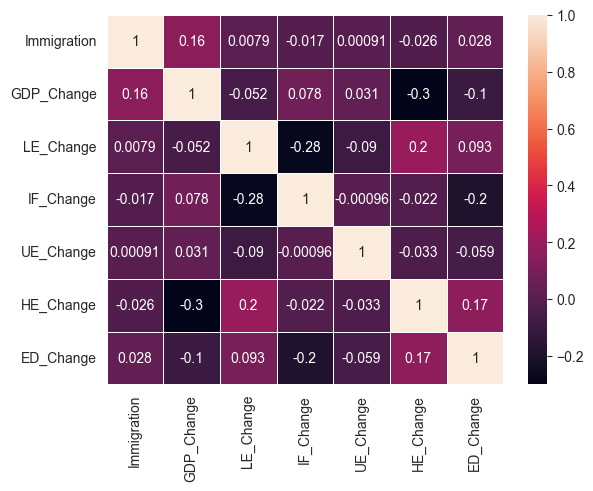

In [123]:
corr = dataset.corr(numeric_only=True)
sb.heatmap(corr, annot=True, linewidth=0.5)

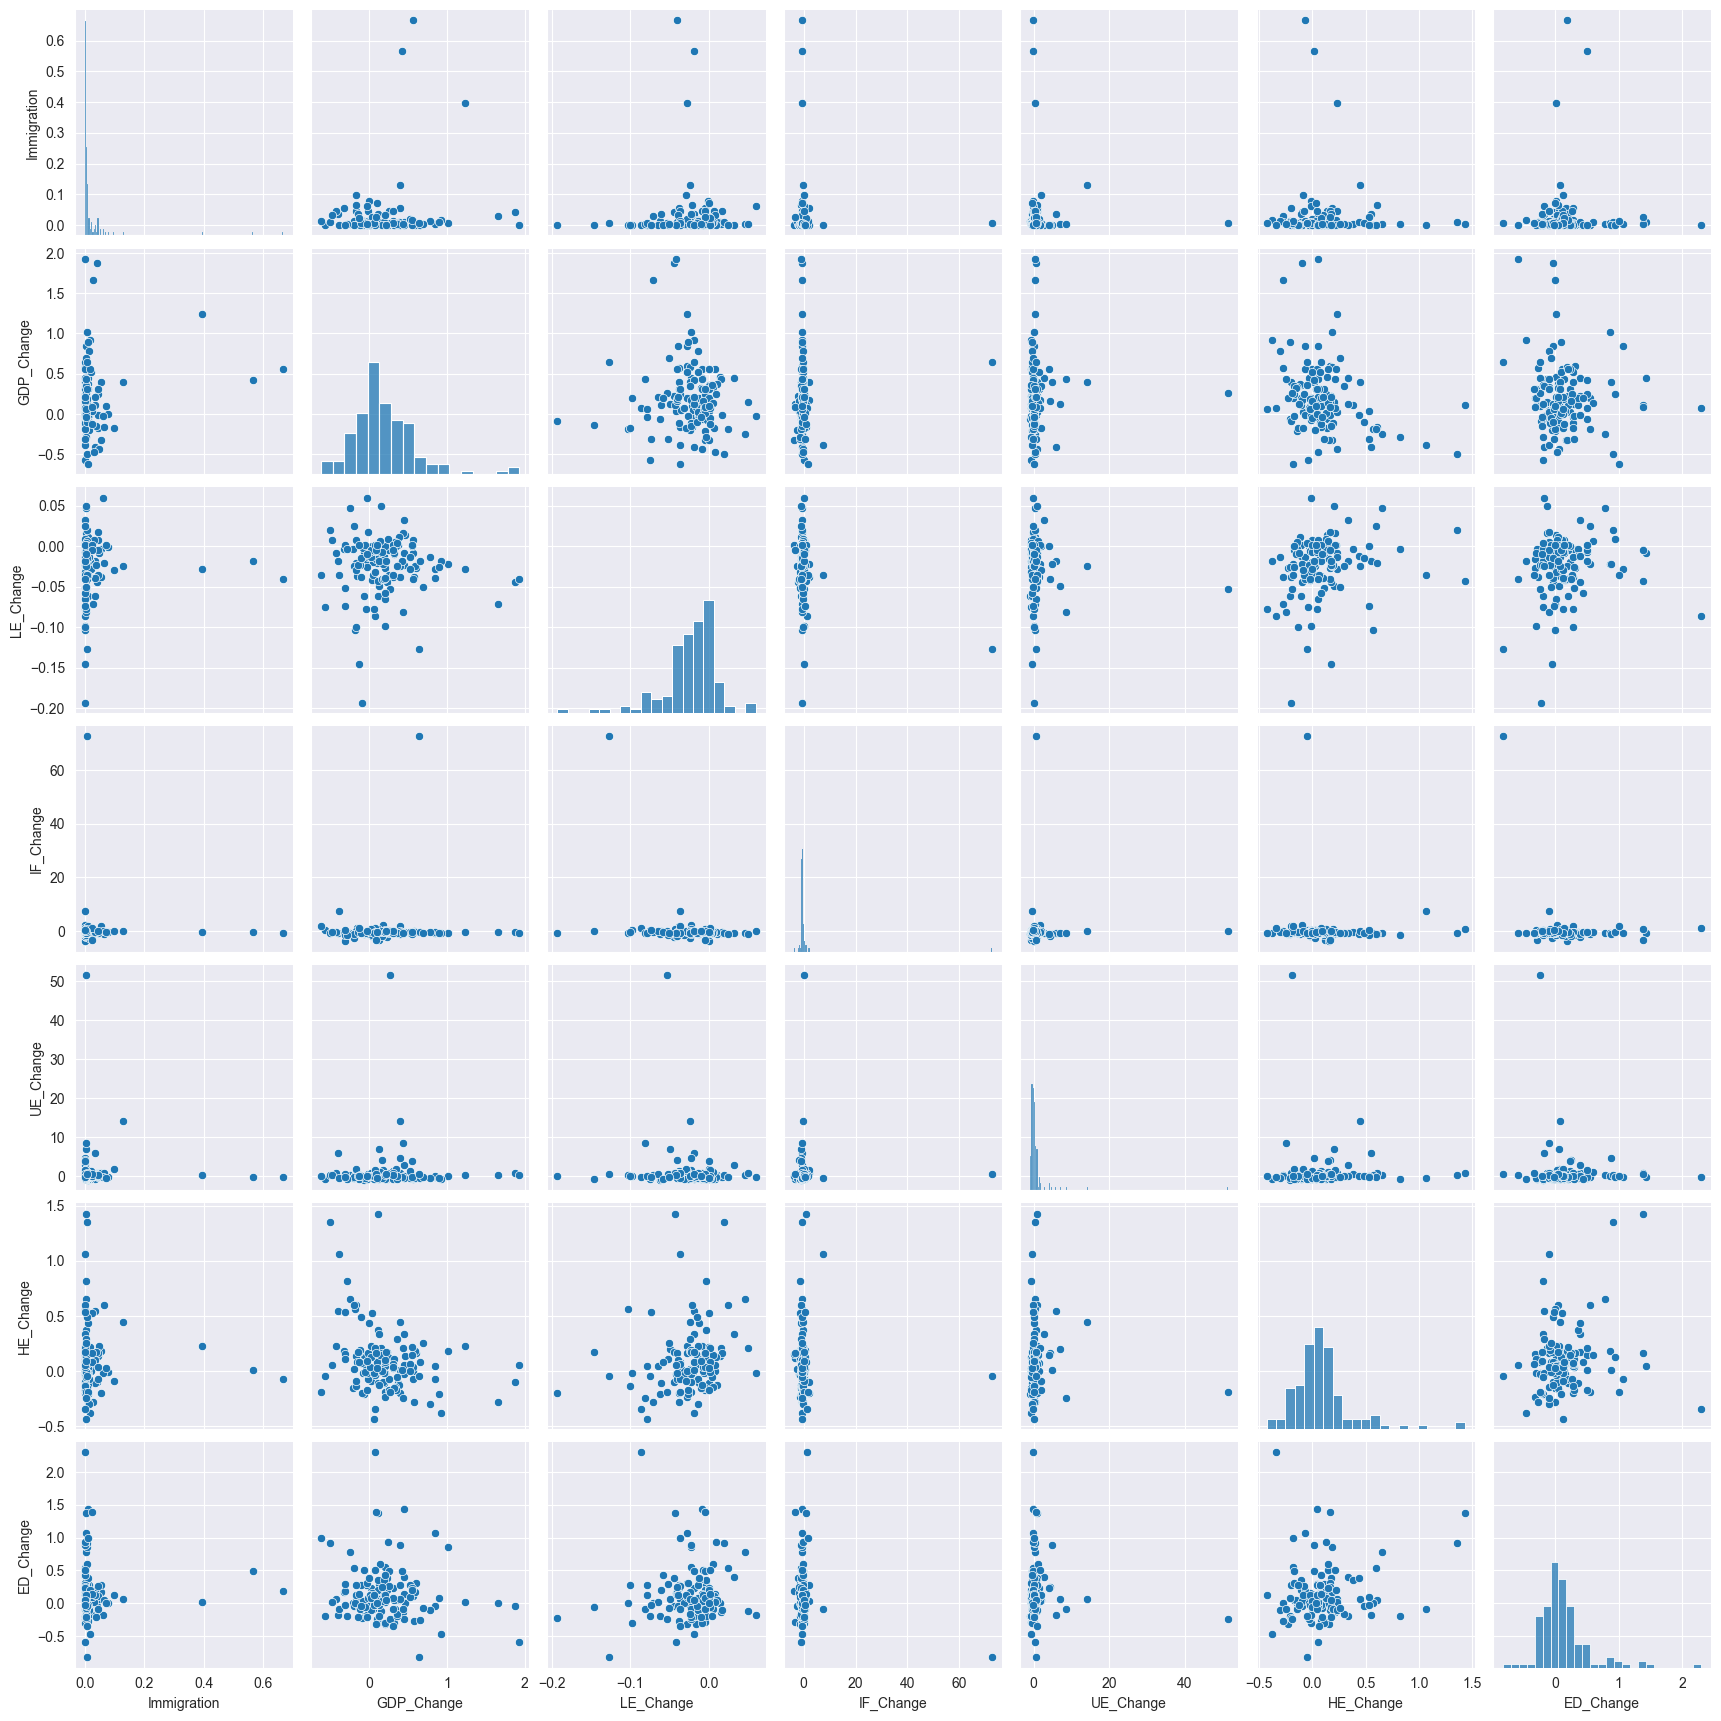

In [124]:
sb.pairplot(dataset)

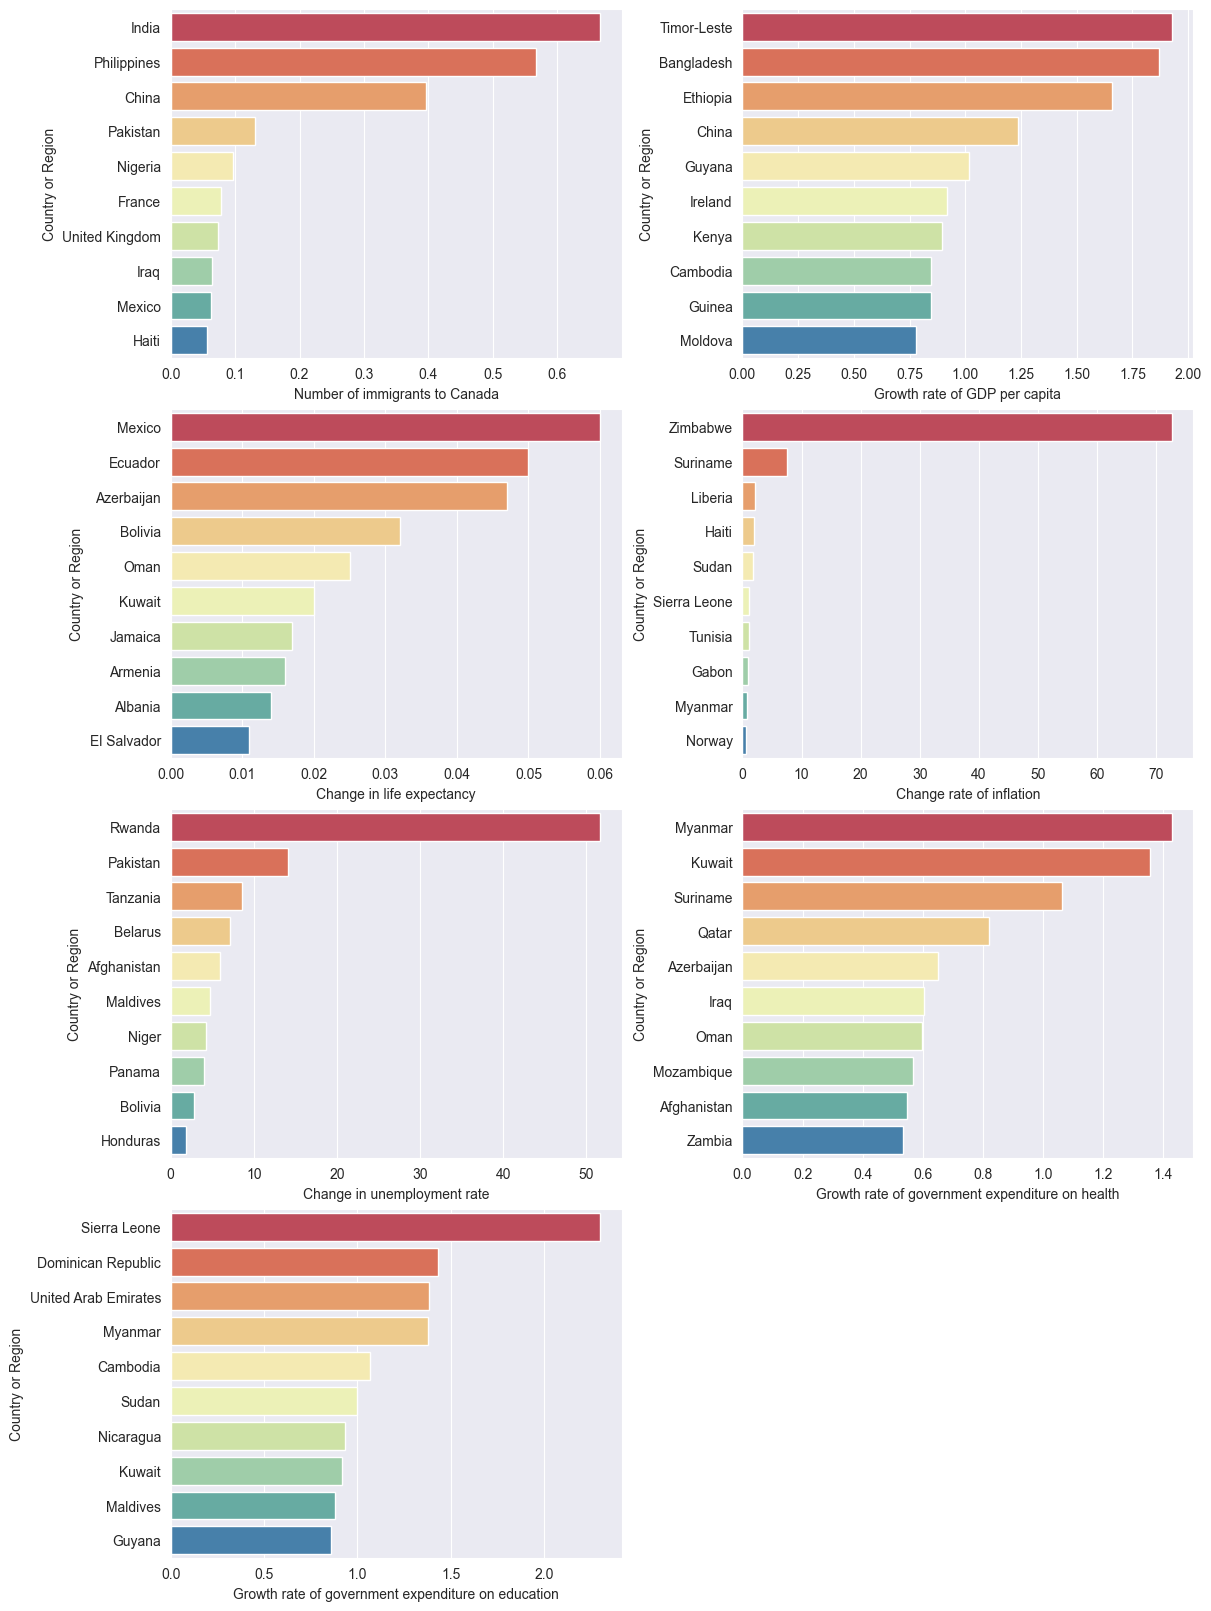

In [125]:
fig, axes = plt.subplots(nrows=4, ncols=2, constrained_layout=True, figsize=(12,16))

sb.barplot(x='Immigration', y='Birthplace', data=dataset.nlargest(10, 'Immigration'), ax=axes[0,0], palette="Spectral")\
    .set(xlabel='Number of immigrants to Canada', ylabel='Country or Region')
sb.barplot(x='GDP_Change' ,y='Birthplace', data=dataset.nlargest(10, 'GDP_Change'), ax=axes[0,1], palette="Spectral")\
    .set(xlabel='Growth rate of GDP per capita', ylabel='Country or Region')
sb.barplot(x='LE_Change',y='Birthplace', data=dataset.nlargest(10, 'LE_Change'), ax=axes[1,0], palette="Spectral")\
    .set(xlabel='Change in life expectancy', ylabel='Country or Region')
sb.barplot(x='IF_Change' ,y='Birthplace', data=dataset.nlargest(10, 'IF_Change'), ax=axes[1,1], palette="Spectral")\
    .set(xlabel='Change rate of inflation', ylabel='Country or Region')
sb.barplot(x='UE_Change',y='Birthplace', data=dataset.nlargest(10, 'UE_Change'), ax=axes[2,0], palette="Spectral")\
    .set(xlabel='Change in unemployment rate', ylabel='Country or Region')
sb.barplot(x='HE_Change' ,y='Birthplace', data=dataset.nlargest(10, 'HE_Change'), ax=axes[2,1], palette="Spectral")\
    .set(xlabel='Growth rate of government expenditure on health', ylabel='Country or Region')
sb.barplot(x='ED_Change',y='Birthplace', data=dataset.nlargest(10, 'ED_Change'), ax=axes[3,0], palette="Spectral")\
    .set(xlabel='Growth rate of government expenditure on education', ylabel='Country or Region')
fig.delaxes(axes[3,1])

In [126]:
X = pd.DataFrame({'Immigration':nor[0][:], 'GDP':c}).to_numpy()
y_pred = KMeans(n_clusters=2, random_state=0, n_init=10).fit_predict(X)


#plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], s=100, c='red', label ='Cluster 1')
#plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=100, c='blue', label ='Cluster 2')
#plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], s=100, c='green', label ='Cluster 3')
#print([a, y_pred])
# for i in range(len(y_pred)):
#     if y_pred[i]==0:
#         plt.text(X[y_pred==0, 0], X[y_pred==0, 1],s=a[i], fontdict=dict(color='red',size=5))
#     if y_pred[i]==1:
#         plt.text(X[y_pred==1, 0], X[y_pred==1, 1],s=a[i], fontdict=dict(color='blue',size=5))
#plt.show()
